<a href="https://colab.research.google.com/github/PedroAdair/PronosticoVentas/blob/main/Clustering_series_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pronostico de ventas optimizado para productos perecederos
## Andrea Garcia, Daniel Gomez, Adair Gallegos
### Centro de Investigación en Matemáticas AC  Unidad Monterrey

In [ ]:
#@title "calmap" permite generar mapas similares a los de github
!pip install calmap

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime, timedelta
import calmap

In [3]:
data = "/content/drive/MyDrive/Consultoria/data_ventas.xlsx"

In [5]:
def ventas_calendario(nombre_archivo):
    # leer el archivo de excel en un DataFrame de pandas
    df = pd.read_excel(nombre_archivo)
    
    # convertir la columna FECHA en un objeto datetime
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    
    # agrupar por FECHA y sumar las unidades vendidas
    resumen = df.groupby('FECHA')['UNI'].sum().reset_index()
    
    # filtrar meses sin ventas
    resumen = resumen.loc[resumen['UNI'] != 0]
    
    # crear el objeto calmap
    calmap.calendarplot(resumen.set_index('FECHA')['UNI'], 
                        monthticks=3, daylabels='LMMJVSD',
                        cmap='YlGnBu', fillcolor='grey', linewidth=0.05,
                        fig_kws=dict(figsize=(20,10)))
    plt.title('Ventas por día y mes')
    plt.show()

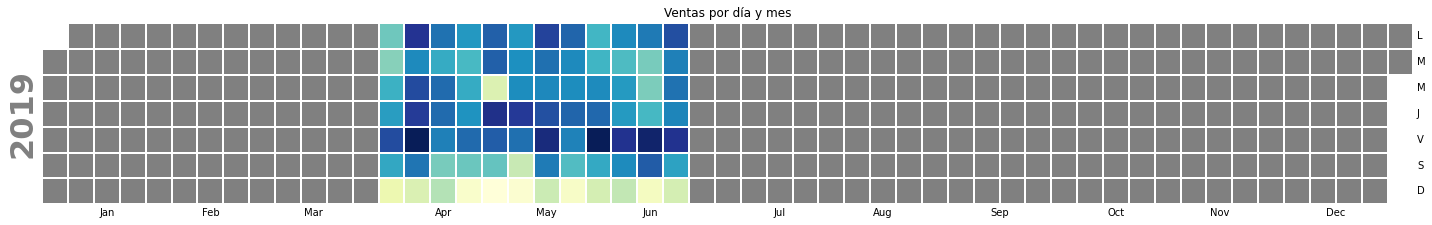

In [6]:
ventas_calendario(data)

en un primer analisis de resultados, el día de la semana que mayores ventas se registran

Ahora, trataremos de hacer algunos analisis preeliminares 

In [7]:
df_ventas = pd.read_excel("/content/drive/MyDrive/Consultoria/data_ventas.xlsx")
df_catalogo = pd.read_excel("/content/drive/MyDrive/Consultoria/Catalogo.xlsx")

"Unimos" las dos bases de datos en base al Arriculo = SKU 

In [9]:
df = pd.merge(df_ventas, df_catalogo[["Articulo", "Precio", "Costo"]], left_on="SKU", right_on="Articulo", how="left")

Creamos las columnas de "Ventas" y "Ganancias"

In [10]:
df["Ventas"] = df["UNI"] * df["Precio"]
df["Ganancia"] = df["UNI"] * (df["Precio"] - df["Costo"])

Ahora generamos un nuevo df que contiene las ventas registradas por cada tienda de forma diaria. Los NA se sustituyen por 0
* ¿por que hay NA? 
* ¿Acaso corresponde a tiendas que se abrieron despues de la fecha de estudio de caso?
* ¿es posible hacer una clasificiación de series de tiempo?

In [ ]:
ventas_tiendas = pd.pivot_table(df, values='Ventas', index=['LOC'], columns=[ 'FECHA'], aggfunc=sum)
ventas_tiendas = ventas_tiendas.fillna(0)
ventas_tiendas